In [1]:
import pandas as pd
import numpy as np

data1 = pd.read_excel('matrix_all_genes.xlsx')
data = pd.read_excel('seurat_labels.xlsx')
data2 = pd.read_excel("markers_features_cardio.xlsx")
# data = data.set_index(' ')
data = data.rename(columns={' ': 'Row.names'})

In [2]:
data["Class"] = 0

In [3]:
data

,Row.names,integrated@active.ident,Class
0,sham_sham1_3,Cardiomyocytes,0
1,sham_sham1_4,Cardiomyocytes,0
2,sham_sham1_9,Cardiomyocytes,0
3,sham_sham1_18,Cardiomyocytes,0
4,sham_sham1_19,Cardiomyocytes,0
...,...,...,...
1730,mi_mi5_379,Fibroblasts,0
1731,mi_mi5_380,Immune,0
1732,mi_mi5_381,Fibroblasts,0
1733,mi_mi5_383,Fibroblasts,0


In [4]:
for index, row in data.iterrows():
    #print(row['integrated@active.ident'])
    if row['integrated@active.ident'] == "Cardiomyocytes":
        if "mi_mi" in row["Row.names"]:
     #       data.loc[index] = 0
            data['Class'].iloc[index]=0
        else:
            data['Class'].iloc[index]=1
    elif row['integrated@active.ident'] == "Fibroblasts":
        data['Class'].iloc[index]= np.NaN
    elif row['integrated@active.ident'] == "Endothelial":
        data['Class'].iloc[index]= np.NaN
    else:
        data['Class'].iloc[index]= np.NaN

/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
data.dropna(subset = ["Class"], inplace=True)

In [6]:
data.groupby('Class').count()

,Row.names,integrated@active.ident
Class,,
0.0,185,185
1.0,575,575


In [7]:
data

,Row.names,integrated@active.ident,Class
0,sham_sham1_3,Cardiomyocytes,1.0
1,sham_sham1_4,Cardiomyocytes,1.0
2,sham_sham1_9,Cardiomyocytes,1.0
3,sham_sham1_18,Cardiomyocytes,1.0
4,sham_sham1_19,Cardiomyocytes,1.0
...,...,...,...
1718,mi_mi5_360,Cardiomyocytes,0.0
1721,mi_mi5_365,Cardiomyocytes,0.0
1724,mi_mi5_369,Cardiomyocytes,0.0
1727,mi_mi5_373,Cardiomyocytes,0.0


In [8]:
data.drop(['integrated@active.ident'], axis='columns', inplace=True)

### Matrix

In [9]:
#data1 = data1.set_index(' ')
#data2 = data2.set_index('Row.names')
data1 = data1.rename(columns={' ': 'Row.names'})
data2.drop(['p_val.x','avg_log2FC.x', 'pct.1.x',"pct.2.x",'p_val_adj.x','p_val.y','avg_log2FC.y','pct.1.y','pct.2.y','p_val_adj.y'], axis='columns', inplace=True)
#data2 = data2.drop_duplicates()

In [10]:
data2

,Row.names
0,5430435G22Rik--chr1
1,AA467197--chr2
2,AI662270--chr11
3,Aldh1a2--chr9
4,Anxa1--chr19
5,Arhgef2--chr3
6,Arl4c--chr1
7,Arrb2--chr11
8,Atf3--chr1
9,Bcat1--chr6


In [11]:
data1

,Row.names,sham_sham1_3,sham_sham1_4,sham_sham1_9,sham_sham1_18,sham_sham1_19,sham_sham1_20,sham_sham1_26,sham_sham1_27,sham_sham1_32,...,mi_mi5_370,mi_mi5_372,mi_mi5_373,mi_mi5_376,mi_mi5_378,mi_mi5_379,mi_mi5_380,mi_mi5_381,mi_mi5_383,mi_mi5_384
0,Nppa--chr4,0.682949,0.461998,-0.030087,0.685511,-0.357476,-0.216611,-0.712284,-0.097751,3.355194,...,0.000000,0.000000,3.037880,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Lrg1--chr17,1.158125,1.227301,-0.047149,-0.772731,2.233937,0.235876,-0.153068,-0.735795,2.583236,...,0.000000,0.000000,2.391556,0.0,0.000000,0.000000,3.946290,0.000000,0.000000,0.000000
2,Fabp4--chr3,-0.645581,-0.389633,-0.512315,-0.660781,0.096774,2.739436,0.087506,-0.307935,-0.005465,...,0.000000,2.834721,2.391556,0.0,3.292377,3.624244,1.531369,0.000000,0.000000,0.000000
3,C1qa--chr4,0.226843,0.207889,0.323539,0.229799,0.214139,0.336237,0.278207,0.348932,0.155536,...,0.000000,2.834721,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Spp1--chr5,1.088496,1.693829,1.687589,1.087271,1.309020,1.695335,1.470370,1.024486,1.430577,...,3.056023,2.834721,2.391556,0.0,0.000000,0.000000,2.110092,3.597393,3.356926,3.286162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Kif1b--chr4,1.627405,-0.291695,-0.068967,0.139384,2.386236,-0.465456,-0.197010,-0.490790,-0.187186,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3554,Lamtor4--chr5,-0.164287,-0.008435,0.005992,-0.159693,-0.016171,0.148092,0.074380,-0.014017,0.088066,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.531369,0.000000,0.000000,0.000000
3555,Smad7--chr18,0.000000,0.000000,0.010786,0.000000,0.000000,1.517905,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3556,Ino80--chr2,0.000000,-0.037026,-0.029508,0.000000,0.000000,0.077410,-0.045623,0.000000,-0.028065,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
common = pd.merge(data1, data2, on='Row.names')
common = common.set_index('Row.names')

In [13]:
common

,sham_sham1_3,sham_sham1_4,sham_sham1_9,sham_sham1_18,sham_sham1_19,sham_sham1_20,sham_sham1_26,sham_sham1_27,sham_sham1_32,sham_sham1_33,...,mi_mi5_370,mi_mi5_372,mi_mi5_373,mi_mi5_376,mi_mi5_378,mi_mi5_379,mi_mi5_380,mi_mi5_381,mi_mi5_383,mi_mi5_384
Row.names,,,,,,,,,,,,,,,,,,,,,
Aqp1--chr6,-0.048037,-0.098917,-0.128577,-0.045610,0.035410,0.560380,-0.028728,-0.002029,-0.027647,0.031911,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apoe--chr7,2.117376,2.110790,2.433269,2.099227,2.836488,1.579960,2.515582,2.655216,2.659253,2.593538,...,4.627074,4.396031,3.037880,3.193127,0.000000,4.303966,1.531369,3.205533,0.000000,2.629729
Acta1--chr8,-0.087128,0.304446,0.024248,-0.087041,2.380617,-0.227850,-0.072818,-0.367294,-0.207173,-0.144921,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.286162
Aldh1a2--chr9,0.238733,0.299730,0.137556,0.239650,0.256516,0.397188,0.340230,0.388198,0.384199,0.328922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bicc1--chr10,0.072901,0.071901,0.272267,0.071221,0.106721,0.007473,0.111313,0.128302,0.128449,0.071032,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arrb2--chr11,0.066396,0.166559,0.046804,0.065493,0.171174,0.191256,0.302984,0.137880,0.308785,0.364999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.531369,0.000000,3.356926,0.000000
Apobec2--chr17,1.780551,0.036951,-0.094856,0.932010,-0.439033,-0.077887,-0.329931,-0.208940,-0.289772,-0.077075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Actb--chr5,3.594505,3.618213,2.892490,4.271404,4.002239,4.941974,3.842381,3.773461,6.622610,3.987678,...,4.960747,4.576296,4.608214,5.353186,4.365900,4.704916,5.352905,4.620962,4.716741,4.644007
5430435G22Rik--chr1,0.043206,0.171496,0.242313,0.036480,0.367100,0.232674,0.419763,0.351762,0.447085,0.320508,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.934005,3.356926,0.000000


In [14]:
common = common.drop_duplicates()
common = common.T

In [15]:
common

Row.names,Aqp1--chr6,Apoe--chr7,Acta1--chr8,Aldh1a2--chr9,Bicc1--chr10,Arrb2--chr11,Apobec2--chr17,Actb--chr5,5430435G22Rik--chr1,Atl2--chr17,...,Atf3--chr1,Arl4c--chr1,Actg1--chr11,AA467197--chr2,Art3--chr5,Arhgef2--chr3,Cchcr1--chr17,AI662270--chr11,Adprhl1--chr8,Appl2--chr10
sham_sham1_3,-0.048037,2.117376,-0.087128,0.238733,0.072901,0.066396,1.780551,3.594505,0.043206,-0.121716,...,0.144303,0.036507,2.219254,0.201835,1.431749,0.103269,0.180286,0.142376,-0.484982,-0.101203
sham_sham1_4,-0.098917,2.110790,0.304446,0.299730,0.071901,0.166559,0.036951,3.618213,0.171496,-0.030873,...,0.126883,0.049393,4.491710,0.082989,-1.116979,0.141726,0.152264,0.000000,-0.304162,-0.048611
sham_sham1_9,-0.128577,2.433269,0.024248,0.137556,0.272267,0.046804,-0.094856,2.892490,0.242313,0.003799,...,0.290542,0.271288,1.745225,0.173280,-0.066770,0.251306,-0.053702,0.015322,-0.253901,0.037559
sham_sham1_18,-0.045610,2.099227,-0.087041,0.239650,0.071221,0.065493,0.932010,4.271404,0.036480,0.572454,...,0.141689,0.034624,2.219855,0.201546,0.812681,1.193515,0.177265,0.138345,1.617058,0.591464
sham_sham1_19,0.035410,2.836488,2.380617,0.256516,0.106721,0.171174,-0.439033,4.002239,0.367100,-0.045696,...,0.122347,0.162261,2.549172,0.184005,-0.554362,0.352157,0.024765,0.086388,-0.304328,-0.075726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mi_mi5_379,0.000000,4.303966,0.000000,0.000000,0.000000,0.000000,0.000000,4.704916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mi_mi5_380,0.000000,1.531369,0.000000,0.000000,0.000000,1.531369,0.000000,5.352905,0.000000,0.000000,...,1.531369,0.000000,4.297150,0.000000,0.000000,2.474309,0.000000,0.000000,0.000000,1.531369
mi_mi5_381,0.000000,3.205533,0.000000,0.000000,0.000000,0.000000,0.000000,4.620962,1.934005,0.000000,...,0.000000,0.000000,4.276748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mi_mi5_383,0.000000,0.000000,0.000000,0.000000,0.000000,3.356926,0.000000,4.716741,3.356926,0.000000,...,0.000000,0.000000,4.716741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
common.index.name = 'Row.names'
common.reset_index(inplace=True)

In [17]:
common

Row.names,Row.names,Aqp1--chr6,Apoe--chr7,Acta1--chr8,Aldh1a2--chr9,Bicc1--chr10,Arrb2--chr11,Apobec2--chr17,Actb--chr5,5430435G22Rik--chr1,...,Atf3--chr1,Arl4c--chr1,Actg1--chr11,AA467197--chr2,Art3--chr5,Arhgef2--chr3,Cchcr1--chr17,AI662270--chr11,Adprhl1--chr8,Appl2--chr10
0,sham_sham1_3,-0.048037,2.117376,-0.087128,0.238733,0.072901,0.066396,1.780551,3.594505,0.043206,...,0.144303,0.036507,2.219254,0.201835,1.431749,0.103269,0.180286,0.142376,-0.484982,-0.101203
1,sham_sham1_4,-0.098917,2.110790,0.304446,0.299730,0.071901,0.166559,0.036951,3.618213,0.171496,...,0.126883,0.049393,4.491710,0.082989,-1.116979,0.141726,0.152264,0.000000,-0.304162,-0.048611
2,sham_sham1_9,-0.128577,2.433269,0.024248,0.137556,0.272267,0.046804,-0.094856,2.892490,0.242313,...,0.290542,0.271288,1.745225,0.173280,-0.066770,0.251306,-0.053702,0.015322,-0.253901,0.037559
3,sham_sham1_18,-0.045610,2.099227,-0.087041,0.239650,0.071221,0.065493,0.932010,4.271404,0.036480,...,0.141689,0.034624,2.219855,0.201546,0.812681,1.193515,0.177265,0.138345,1.617058,0.591464
4,sham_sham1_19,0.035410,2.836488,2.380617,0.256516,0.106721,0.171174,-0.439033,4.002239,0.367100,...,0.122347,0.162261,2.549172,0.184005,-0.554362,0.352157,0.024765,0.086388,-0.304328,-0.075726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,mi_mi5_379,0.000000,4.303966,0.000000,0.000000,0.000000,0.000000,0.000000,4.704916,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1731,mi_mi5_380,0.000000,1.531369,0.000000,0.000000,0.000000,1.531369,0.000000,5.352905,0.000000,...,1.531369,0.000000,4.297150,0.000000,0.000000,2.474309,0.000000,0.000000,0.000000,1.531369
1732,mi_mi5_381,0.000000,3.205533,0.000000,0.000000,0.000000,0.000000,0.000000,4.620962,1.934005,...,0.000000,0.000000,4.276748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1733,mi_mi5_383,0.000000,0.000000,0.000000,0.000000,0.000000,3.356926,0.000000,4.716741,3.356926,...,0.000000,0.000000,4.716741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Combining Matrix Labels

In [18]:
total_data = pd.merge(common, data, on='Row.names')
total_data = total_data.set_index('Row.names')

In [19]:
total_data_colnames = np.array(total_data.columns)

In [20]:
total_data

,Aqp1--chr6,Apoe--chr7,Acta1--chr8,Aldh1a2--chr9,Bicc1--chr10,Arrb2--chr11,Apobec2--chr17,Actb--chr5,5430435G22Rik--chr1,Atl2--chr17,...,Arl4c--chr1,Actg1--chr11,AA467197--chr2,Art3--chr5,Arhgef2--chr3,Cchcr1--chr17,AI662270--chr11,Adprhl1--chr8,Appl2--chr10,Class
Row.names,,,,,,,,,,,,,,,,,,,,,
sham_sham1_3,-0.048037,2.117376,-0.087128,0.238733,0.072901,0.066396,1.780551,3.594505,0.043206,-0.121716,...,0.036507,2.219254,0.201835,1.431749,0.103269,0.180286,0.142376,-0.484982,-0.101203,1.0
sham_sham1_4,-0.098917,2.110790,0.304446,0.299730,0.071901,0.166559,0.036951,3.618213,0.171496,-0.030873,...,0.049393,4.491710,0.082989,-1.116979,0.141726,0.152264,0.000000,-0.304162,-0.048611,1.0
sham_sham1_9,-0.128577,2.433269,0.024248,0.137556,0.272267,0.046804,-0.094856,2.892490,0.242313,0.003799,...,0.271288,1.745225,0.173280,-0.066770,0.251306,-0.053702,0.015322,-0.253901,0.037559,1.0
sham_sham1_18,-0.045610,2.099227,-0.087041,0.239650,0.071221,0.065493,0.932010,4.271404,0.036480,0.572454,...,0.034624,2.219855,0.201546,0.812681,1.193515,0.177265,0.138345,1.617058,0.591464,1.0
sham_sham1_19,0.035410,2.836488,2.380617,0.256516,0.106721,0.171174,-0.439033,4.002239,0.367100,-0.045696,...,0.162261,2.549172,0.184005,-0.554362,0.352157,0.024765,0.086388,-0.304328,-0.075726,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mi_mi5_360,0.000000,3.508478,0.000000,0.000000,0.000000,0.000000,0.000000,3.508478,0.000000,0.000000,...,0.000000,3.117873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mi_mi5_365,0.000000,3.426277,0.000000,0.000000,0.000000,0.000000,0.000000,4.904746,0.000000,0.000000,...,0.000000,4.322870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mi_mi5_369,0.000000,3.075521,0.000000,0.000000,0.000000,0.000000,0.000000,3.745314,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [63]:
# Importing the dataset
total_data
X = total_data.iloc[:, :-1].values
y = total_data.iloc[:, 24].values

## Mi - Sham Classification with Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
sum_acc = 0
clf = DecisionTreeClassifier()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
     #   print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = clf.fit(X_train,y_train)
        
        y_pred = clf.predict(X_test)
#         print(y_pred)
#         print(y_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions) 
        sum_acc = sum_acc + accuracy
        print(roc_auc_score(y_test, y_pred))
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(sum_acc/5)

0.9956521739130435
Accuracy: 99.34%
1.0
Accuracy: 100.00%
0.9869565217391305
Accuracy: 98.03%
0.9864864864864865
Accuracy: 99.34%
0.9864864864864865
Accuracy: 99.34%
0.9921052631578947


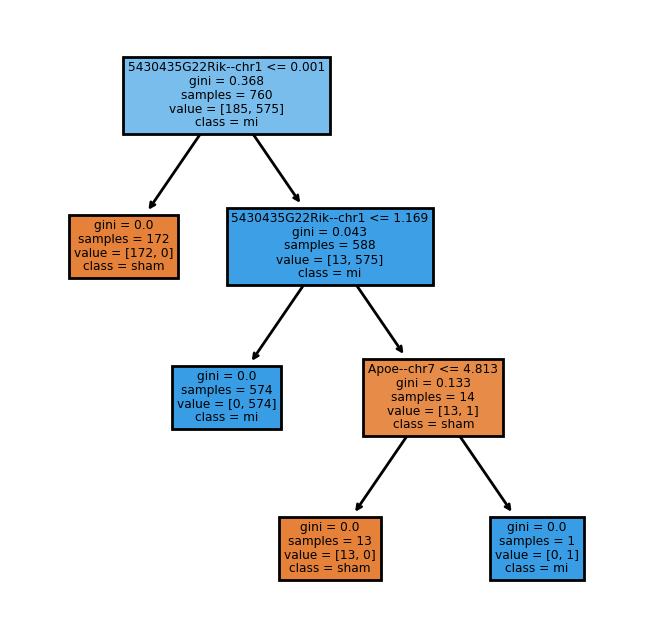

In [67]:
clf = clf.fit(X,y)
cn=['sham','mi']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(clf,
               feature_names = list(total_data_colnames)[:-1], 
               class_names=cn,
               filled = True);
fig.savefig('tree.png')
 